In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
from sklearn.preprocessing import OneHotEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.metrics import f1_score


In [3]:
data = pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data['FastingBS'] = data['FastingBS'].astype('object')
data['HeartDisease'] = data['HeartDisease'].astype('object')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    object 
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 86.2+ KB


In [5]:
data.drop(data.loc[data['RestingBP']==0].index, inplace=True)
data.drop(data.loc[data['Cholesterol']==0].index, inplace=True)
data.reset_index(drop=True, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             746 non-null    int64  
 1   Sex             746 non-null    object 
 2   ChestPainType   746 non-null    object 
 3   RestingBP       746 non-null    int64  
 4   Cholesterol     746 non-null    int64  
 5   FastingBS       746 non-null    object 
 6   RestingECG      746 non-null    object 
 7   MaxHR           746 non-null    int64  
 8   ExerciseAngina  746 non-null    object 
 9   Oldpeak         746 non-null    float64
 10  ST_Slope        746 non-null    object 
 11  HeartDisease    746 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 70.1+ KB


In [6]:
np.random.seed(50)

## One Hot Encoding

One-hot encoding in machine learning is the conversion of categorical information into a format that may be fed into machine learning algorithms to improve prediction accuracy. One-hot encoding is a common method for dealing with categorical data in machine learning

We encode 6 categorical variables into its numeric values which are sex, chest pain type, fasting blood sugar, resting electrocardiogram results, exercise induced angina and the slope of the peak exercise ST segment.

In [7]:
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
data_cat = data[['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope']]
ohe.fit(data_cat)
data_cat_ohe = pd.DataFrame(ohe.transform(data_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(data_cat.columns))

# Check the encoded variables
data_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sex_F              746 non-null    float64
 1   Sex_M              746 non-null    float64
 2   ChestPainType_ASY  746 non-null    float64
 3   ChestPainType_ATA  746 non-null    float64
 4   ChestPainType_NAP  746 non-null    float64
 5   ChestPainType_TA   746 non-null    float64
 6   FastingBS_0        746 non-null    float64
 7   FastingBS_1        746 non-null    float64
 8   RestingECG_LVH     746 non-null    float64
 9   RestingECG_Normal  746 non-null    float64
 10  RestingECG_ST      746 non-null    float64
 11  ExerciseAngina_N   746 non-null    float64
 12  ExerciseAngina_Y   746 non-null    float64
 13  ST_Slope_Down      746 non-null    float64
 14  ST_Slope_Flat      746 non-null    float64
 15  ST_Slope_Up        746 non-null    float64
dtypes: float64(16)
memory usag

In [8]:
# Combining Numeric features with the OHE Categorical features
data_num = data[['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']]
data_res = data['HeartDisease']
data_ohe = pd.concat([data_num, data_cat_ohe, data_res], 
                           sort = False, axis = 1).reindex(index=data_num.index)

# Check the final dataframe
data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                746 non-null    int64  
 1   RestingBP          746 non-null    int64  
 2   Cholesterol        746 non-null    int64  
 3   MaxHR              746 non-null    int64  
 4   Oldpeak            746 non-null    float64
 5   Sex_F              746 non-null    float64
 6   Sex_M              746 non-null    float64
 7   ChestPainType_ASY  746 non-null    float64
 8   ChestPainType_ATA  746 non-null    float64
 9   ChestPainType_NAP  746 non-null    float64
 10  ChestPainType_TA   746 non-null    float64
 11  FastingBS_0        746 non-null    float64
 12  FastingBS_1        746 non-null    float64
 13  RestingECG_LVH     746 non-null    float64
 14  RestingECG_Normal  746 non-null    float64
 15  RestingECG_ST      746 non-null    float64
 16  ExerciseAngina_N   746 non

In [9]:
data_ohe = data_ohe.fillna(0)
data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                746 non-null    int64  
 1   RestingBP          746 non-null    int64  
 2   Cholesterol        746 non-null    int64  
 3   MaxHR              746 non-null    int64  
 4   Oldpeak            746 non-null    float64
 5   Sex_F              746 non-null    float64
 6   Sex_M              746 non-null    float64
 7   ChestPainType_ASY  746 non-null    float64
 8   ChestPainType_ATA  746 non-null    float64
 9   ChestPainType_NAP  746 non-null    float64
 10  ChestPainType_TA   746 non-null    float64
 11  FastingBS_0        746 non-null    float64
 12  FastingBS_1        746 non-null    float64
 13  RestingECG_LVH     746 non-null    float64
 14  RestingECG_Normal  746 non-null    float64
 15  RestingECG_ST      746 non-null    float64
 16  ExerciseAngina_N   746 non

### Classification Tree model (With max_depth = 3)

In [10]:
# Extract Response and Predictors
y = pd.DataFrame(data_ohe['HeartDisease'])
X = pd.DataFrame(data_ohe.drop('HeartDisease', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=50)

[Text(0.5, 0.875, 'ST_Slope_Up <= 0.5\ngini = 0.5\nsamples = 522\nvalue = [266, 256]\nclass = No HeartDisease'),
 Text(0.25, 0.625, 'Sex_M <= 0.5\ngini = 0.325\nsamples = 274\nvalue = [56, 218]\nclass = HeartDisease'),
 Text(0.125, 0.375, 'RestingBP <= 124.5\ngini = 0.5\nsamples = 50\nvalue = [25, 25]\nclass = No HeartDisease'),
 Text(0.0625, 0.125, 'gini = 0.278\nsamples = 12\nvalue = [10, 2]\nclass = No HeartDisease'),
 Text(0.1875, 0.125, 'gini = 0.478\nsamples = 38\nvalue = [15, 23]\nclass = HeartDisease'),
 Text(0.375, 0.375, 'ChestPainType_ASY <= 0.5\ngini = 0.238\nsamples = 224\nvalue = [31, 193]\nclass = HeartDisease'),
 Text(0.3125, 0.125, 'gini = 0.408\nsamples = 63\nvalue = [18, 45]\nclass = HeartDisease'),
 Text(0.4375, 0.125, 'gini = 0.148\nsamples = 161\nvalue = [13, 148]\nclass = HeartDisease'),
 Text(0.75, 0.625, 'ChestPainType_ASY <= 0.5\ngini = 0.259\nsamples = 248\nvalue = [210, 38]\nclass = No HeartDisease'),
 Text(0.625, 0.375, 'Oldpeak <= 2.25\ngini = 0.108\nsampl

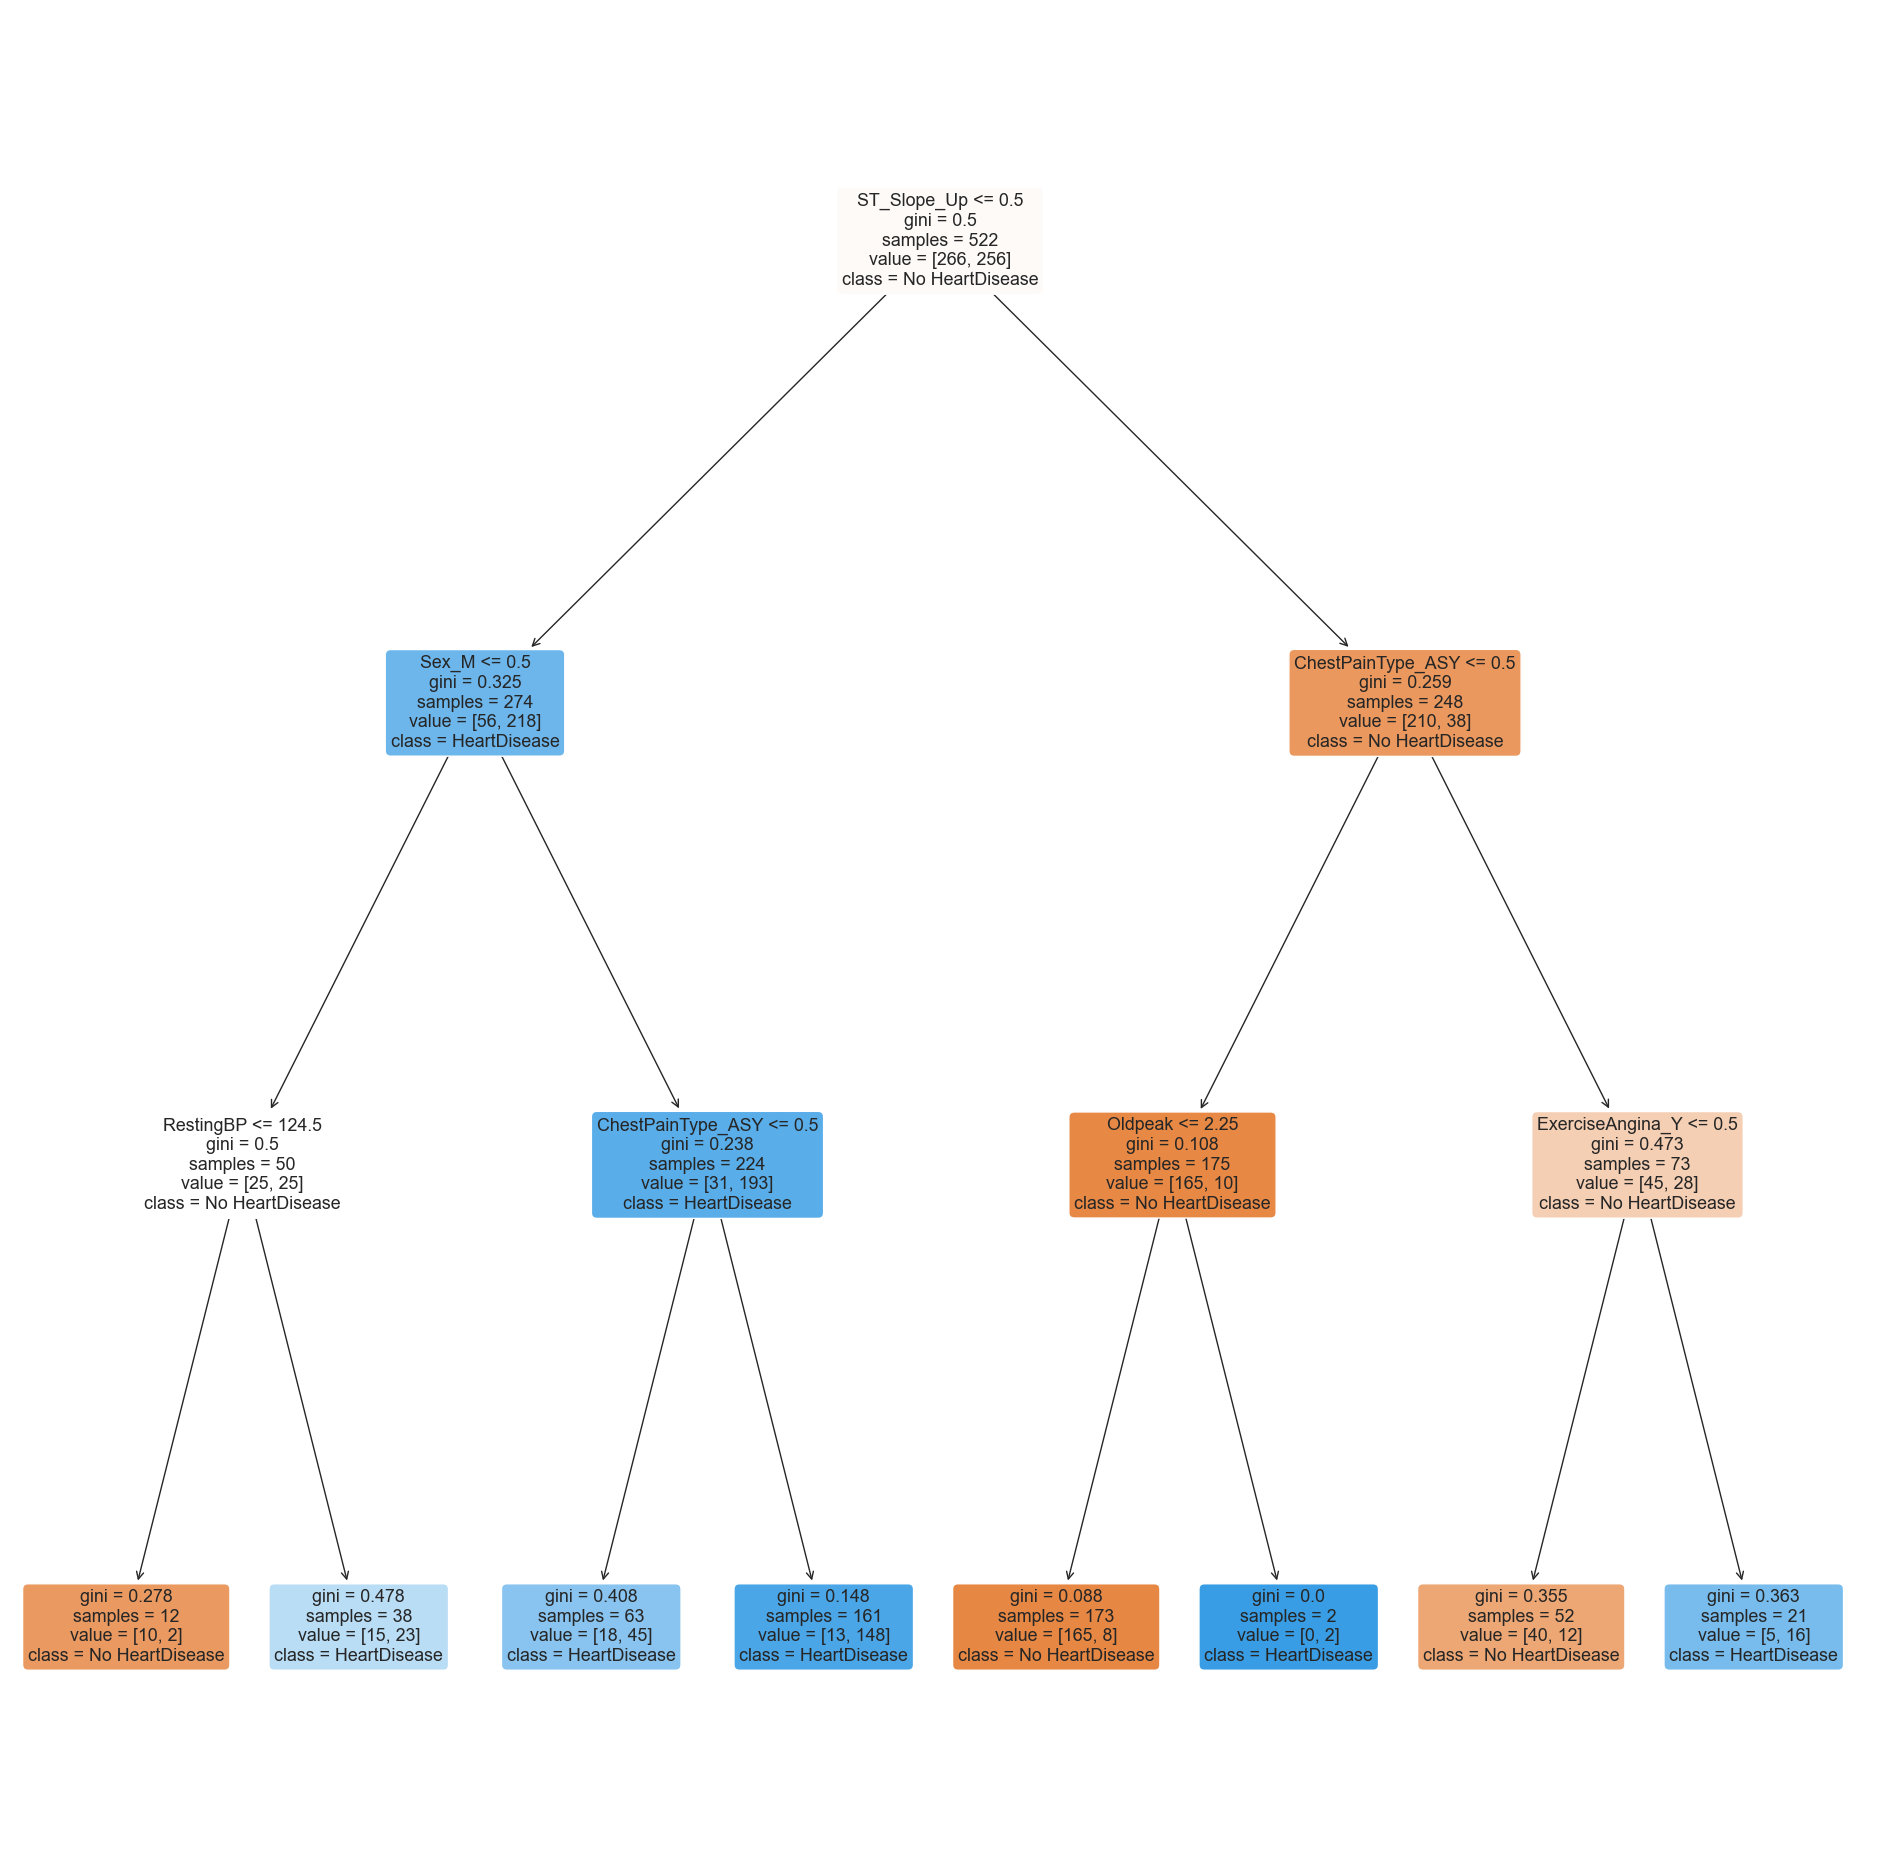

In [11]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["No HeartDisease","HeartDisease"])

### Check the accuracy of the Model

Print the Classification Accuracy and all other Accuracy Measures from the Confusion Matrix.  

| Confusion Matrix  |       |        |        |      
| :---              | :---: | :----: | :----: |         
| Actual Negative   |  (0)  |   TN   |   FP   |             
| Actual Positive   |  (1)  |   FN   |   TP   |       
|                   |       |   (0)   |   (1)   |       
|                   |       | Predicted Negative    |   Predicted Postitive  |     


* `TPR = TP / (TP + FN)` : True Positive Rate = True Positives / All Positives    
* `TNR = TN / (TN + FP)` : True Negative Rate = True Negatives / All Negatives    

* `FPR = FP / (TN + FP)` : False Positive Rate = False Positives / All Negatives 
* `FNR = FN / (TP + FN)` : False Negative Rate = False Negatives / All Positives 

Train Data
Accuracy  :	 0.8601532567049809
F1 Score  :	 0.8650646950092422

TPR Train :	 0.9140625
TNR Train :	 0.8082706766917294

FPR Train :	 0.19172932330827067
FNR Train :	 0.0859375


Test Data
Accuracy  :	 0.84375
F1 Score  :	 0.8430493273542602

TPR Test :	 0.94
TNR Test :	 0.7661290322580645

FPR Test :	 0.23387096774193547
FNR Test :	 0.06


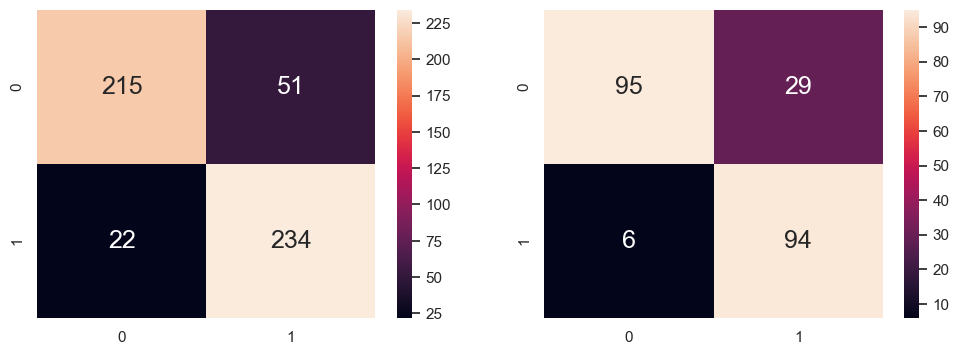

In [12]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print("F1 Score  :\t", f1_score(y_train, y_train_pred))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

print()
print()

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print("F1 Score  :\t", f1_score(y_test, y_test_pred))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

We will now try experimenting with the `max_depth` value to see if we can get a more accurate model.

### Classification Tree model (With max_depth = 4)

[Text(0.5267857142857143, 0.9, 'ST_Slope_Up <= 0.5\ngini = 0.5\nsamples = 522\nvalue = [266, 256]\nclass = No HeartDisease'),
 Text(0.2857142857142857, 0.7, 'Sex_F <= 0.5\ngini = 0.325\nsamples = 274\nvalue = [56, 218]\nclass = HeartDisease'),
 Text(0.14285714285714285, 0.5, 'ChestPainType_ASY <= 0.5\ngini = 0.238\nsamples = 224\nvalue = [31, 193]\nclass = HeartDisease'),
 Text(0.07142857142857142, 0.3, 'RestingBP <= 130.5\ngini = 0.408\nsamples = 63\nvalue = [18, 45]\nclass = HeartDisease'),
 Text(0.03571428571428571, 0.1, 'gini = 0.5\nsamples = 28\nvalue = [14, 14]\nclass = No HeartDisease'),
 Text(0.10714285714285714, 0.1, 'gini = 0.202\nsamples = 35\nvalue = [4, 31]\nclass = HeartDisease'),
 Text(0.21428571428571427, 0.3, 'MaxHR <= 70.0\ngini = 0.148\nsamples = 161\nvalue = [13, 148]\nclass = HeartDisease'),
 Text(0.17857142857142858, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No HeartDisease'),
 Text(0.25, 0.1, 'gini = 0.139\nsamples = 160\nvalue = [12, 148]\nclass = H

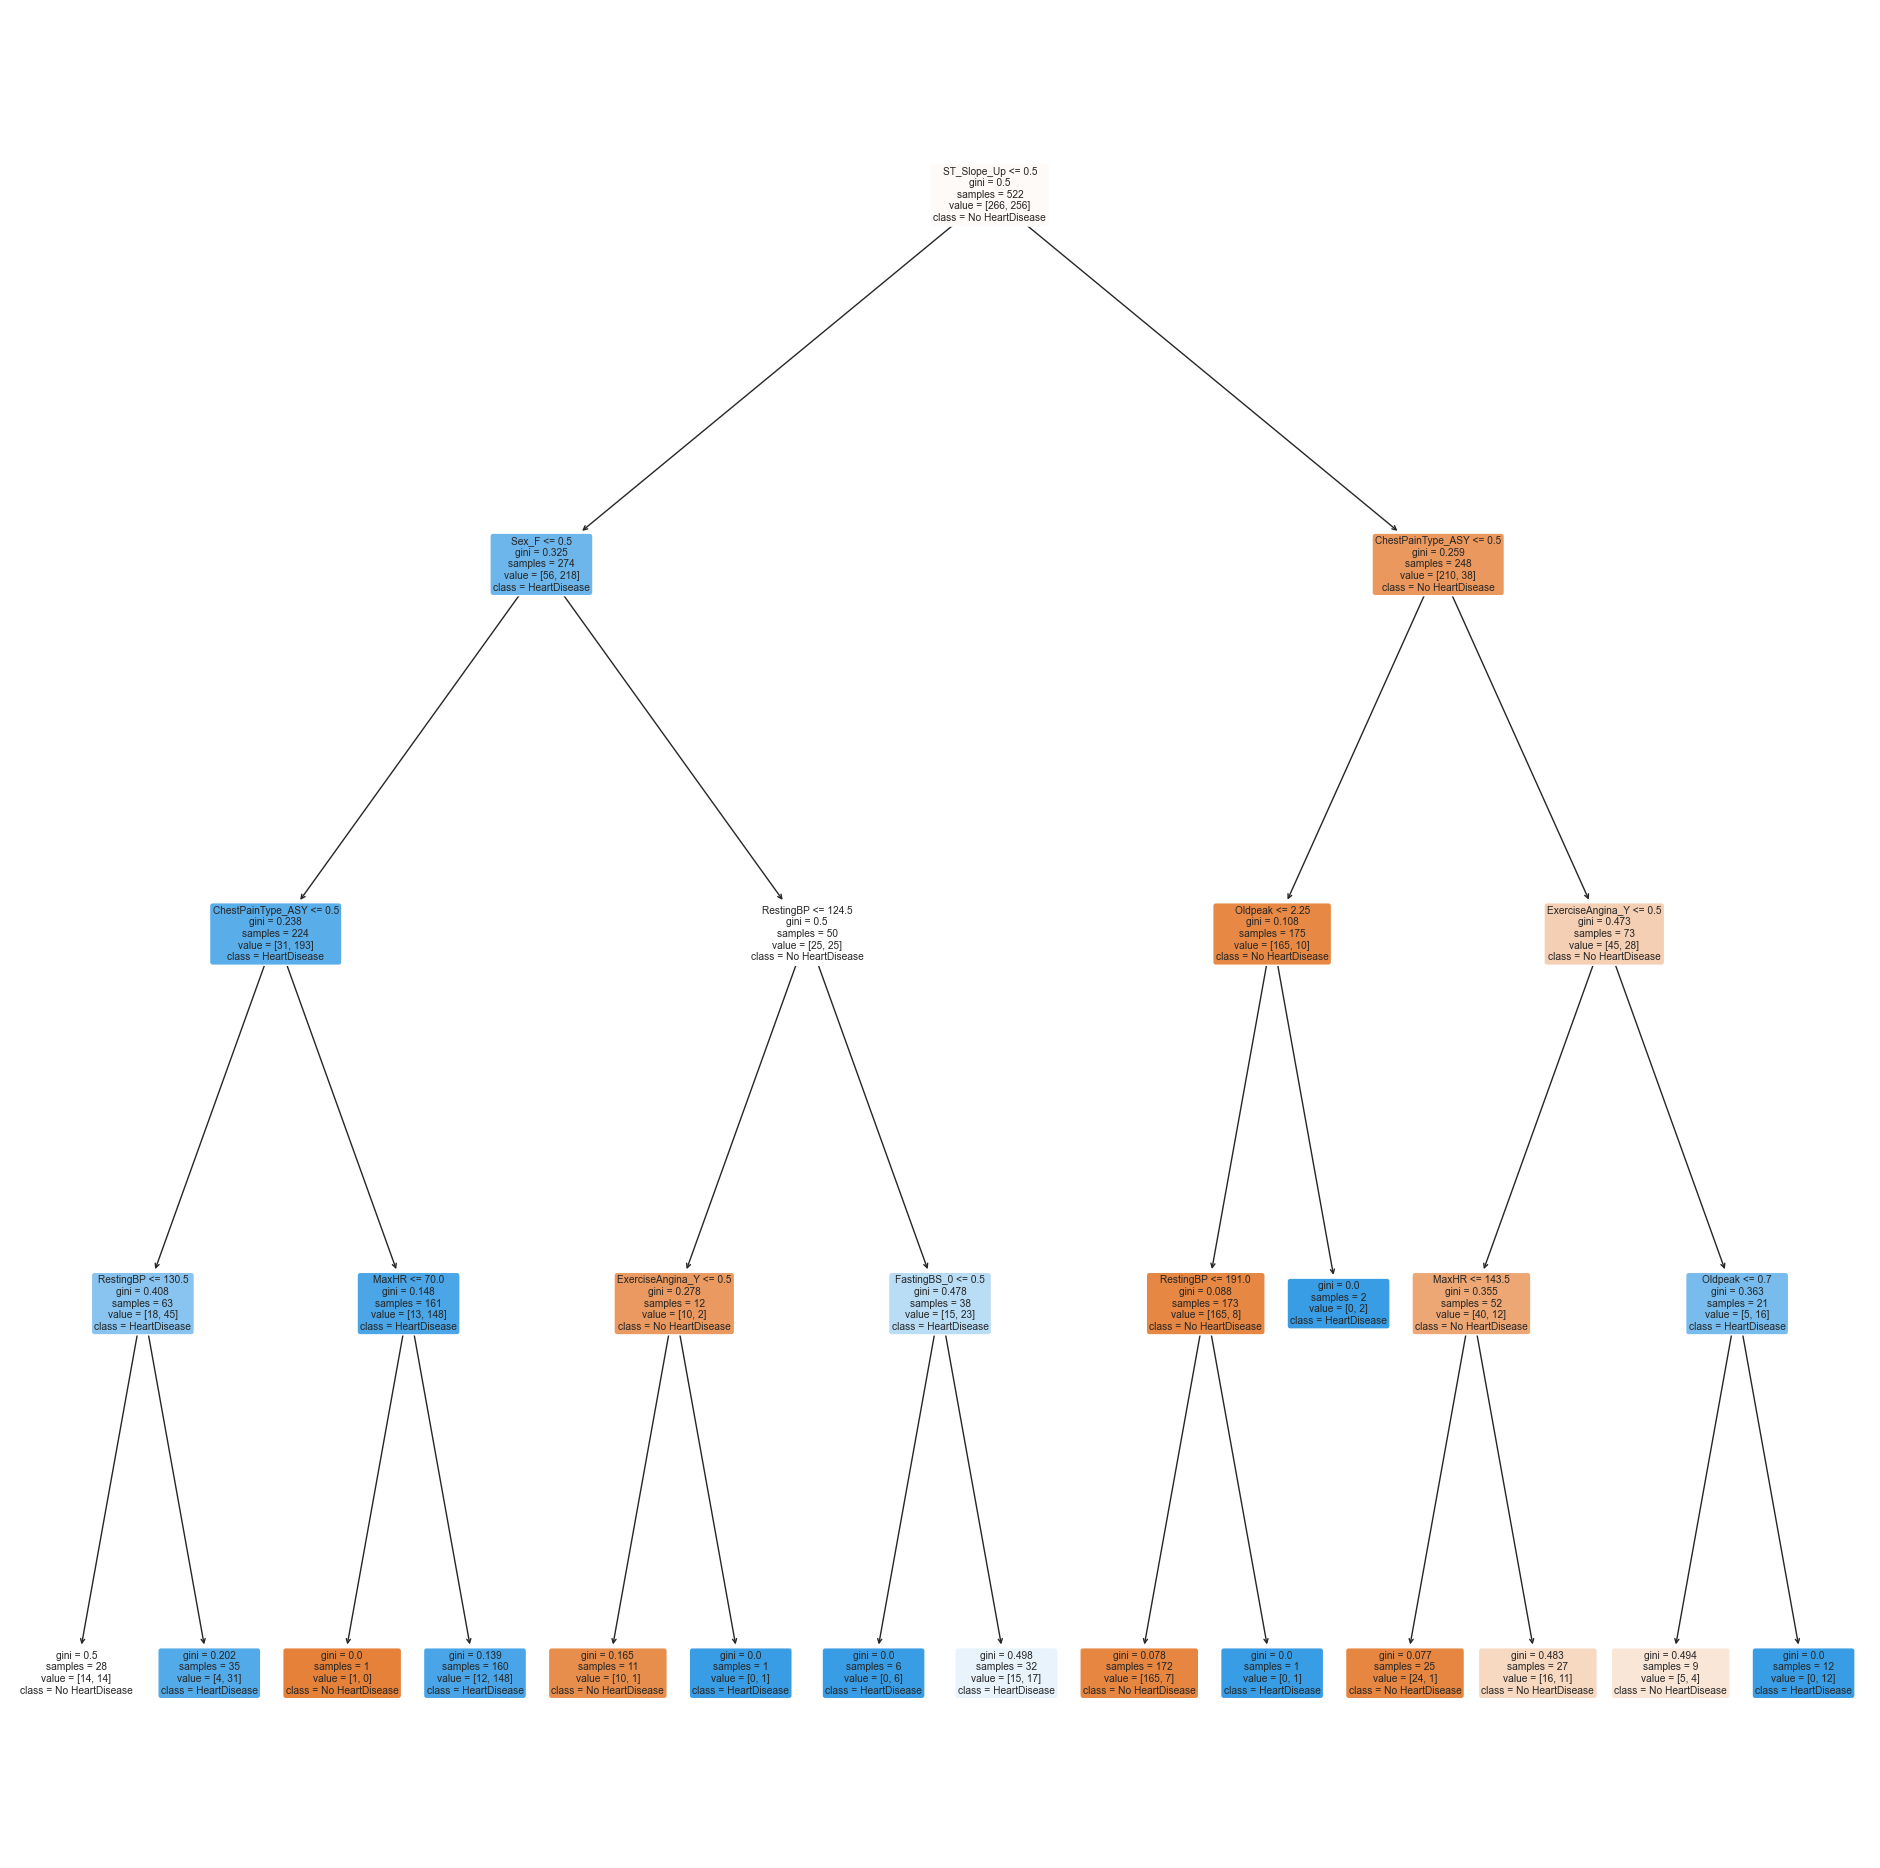

In [13]:
# Extract Response and Predictors
y = pd.DataFrame(data_ohe['HeartDisease'])
X = pd.DataFrame(data_ohe.drop('HeartDisease', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=50)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["No HeartDisease","HeartDisease"])

Train Data
Accuracy  :	 0.867816091954023
F1 Score  :	 0.8633663366336634

TPR Train :	 0.8515625
TNR Train :	 0.8834586466165414

FPR Train :	 0.11654135338345864
FNR Train :	 0.1484375


Test Data
Accuracy  :	 0.8660714285714286
F1 Score  :	 0.8529411764705882

TPR Test :	 0.87
TNR Test :	 0.8629032258064516

FPR Test :	 0.13709677419354838
FNR Test :	 0.13


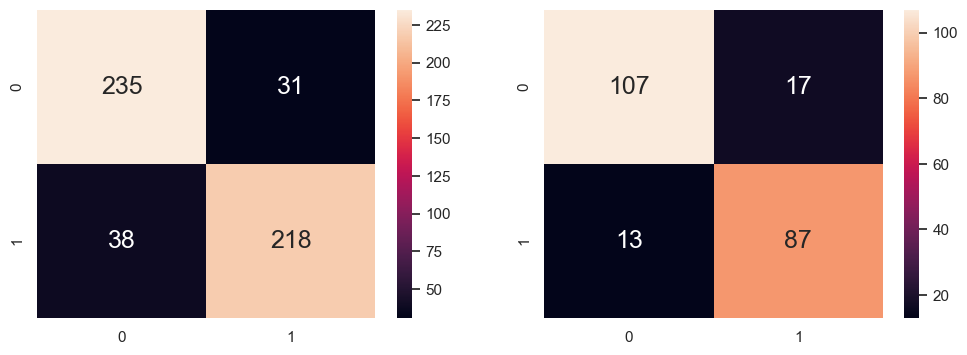

In [14]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print("F1 Score  :\t", f1_score(y_train, y_train_pred))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

print()
print()

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print("F1 Score  :\t", f1_score(y_test, y_test_pred))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

### Classification Tree model (With max_depth = 5)

[Text(0.5067567567567568, 0.9166666666666666, 'ST_Slope_Up <= 0.5\ngini = 0.5\nsamples = 522\nvalue = [266, 256]\nclass = No HeartDisease'),
 Text(0.2635135135135135, 0.75, 'Sex_M <= 0.5\ngini = 0.325\nsamples = 274\nvalue = [56, 218]\nclass = HeartDisease'),
 Text(0.10810810810810811, 0.5833333333333334, 'RestingBP <= 124.5\ngini = 0.5\nsamples = 50\nvalue = [25, 25]\nclass = No HeartDisease'),
 Text(0.05405405405405406, 0.4166666666666667, 'MaxHR <= 106.5\ngini = 0.278\nsamples = 12\nvalue = [10, 2]\nclass = No HeartDisease'),
 Text(0.02702702702702703, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = HeartDisease'),
 Text(0.08108108108108109, 0.25, 'Cholesterol <= 276.0\ngini = 0.165\nsamples = 11\nvalue = [10, 1]\nclass = No HeartDisease'),
 Text(0.05405405405405406, 0.08333333333333333, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]\nclass = No HeartDisease'),
 Text(0.10810810810810811, 0.08333333333333333, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = No HeartDisease'),
 Tex

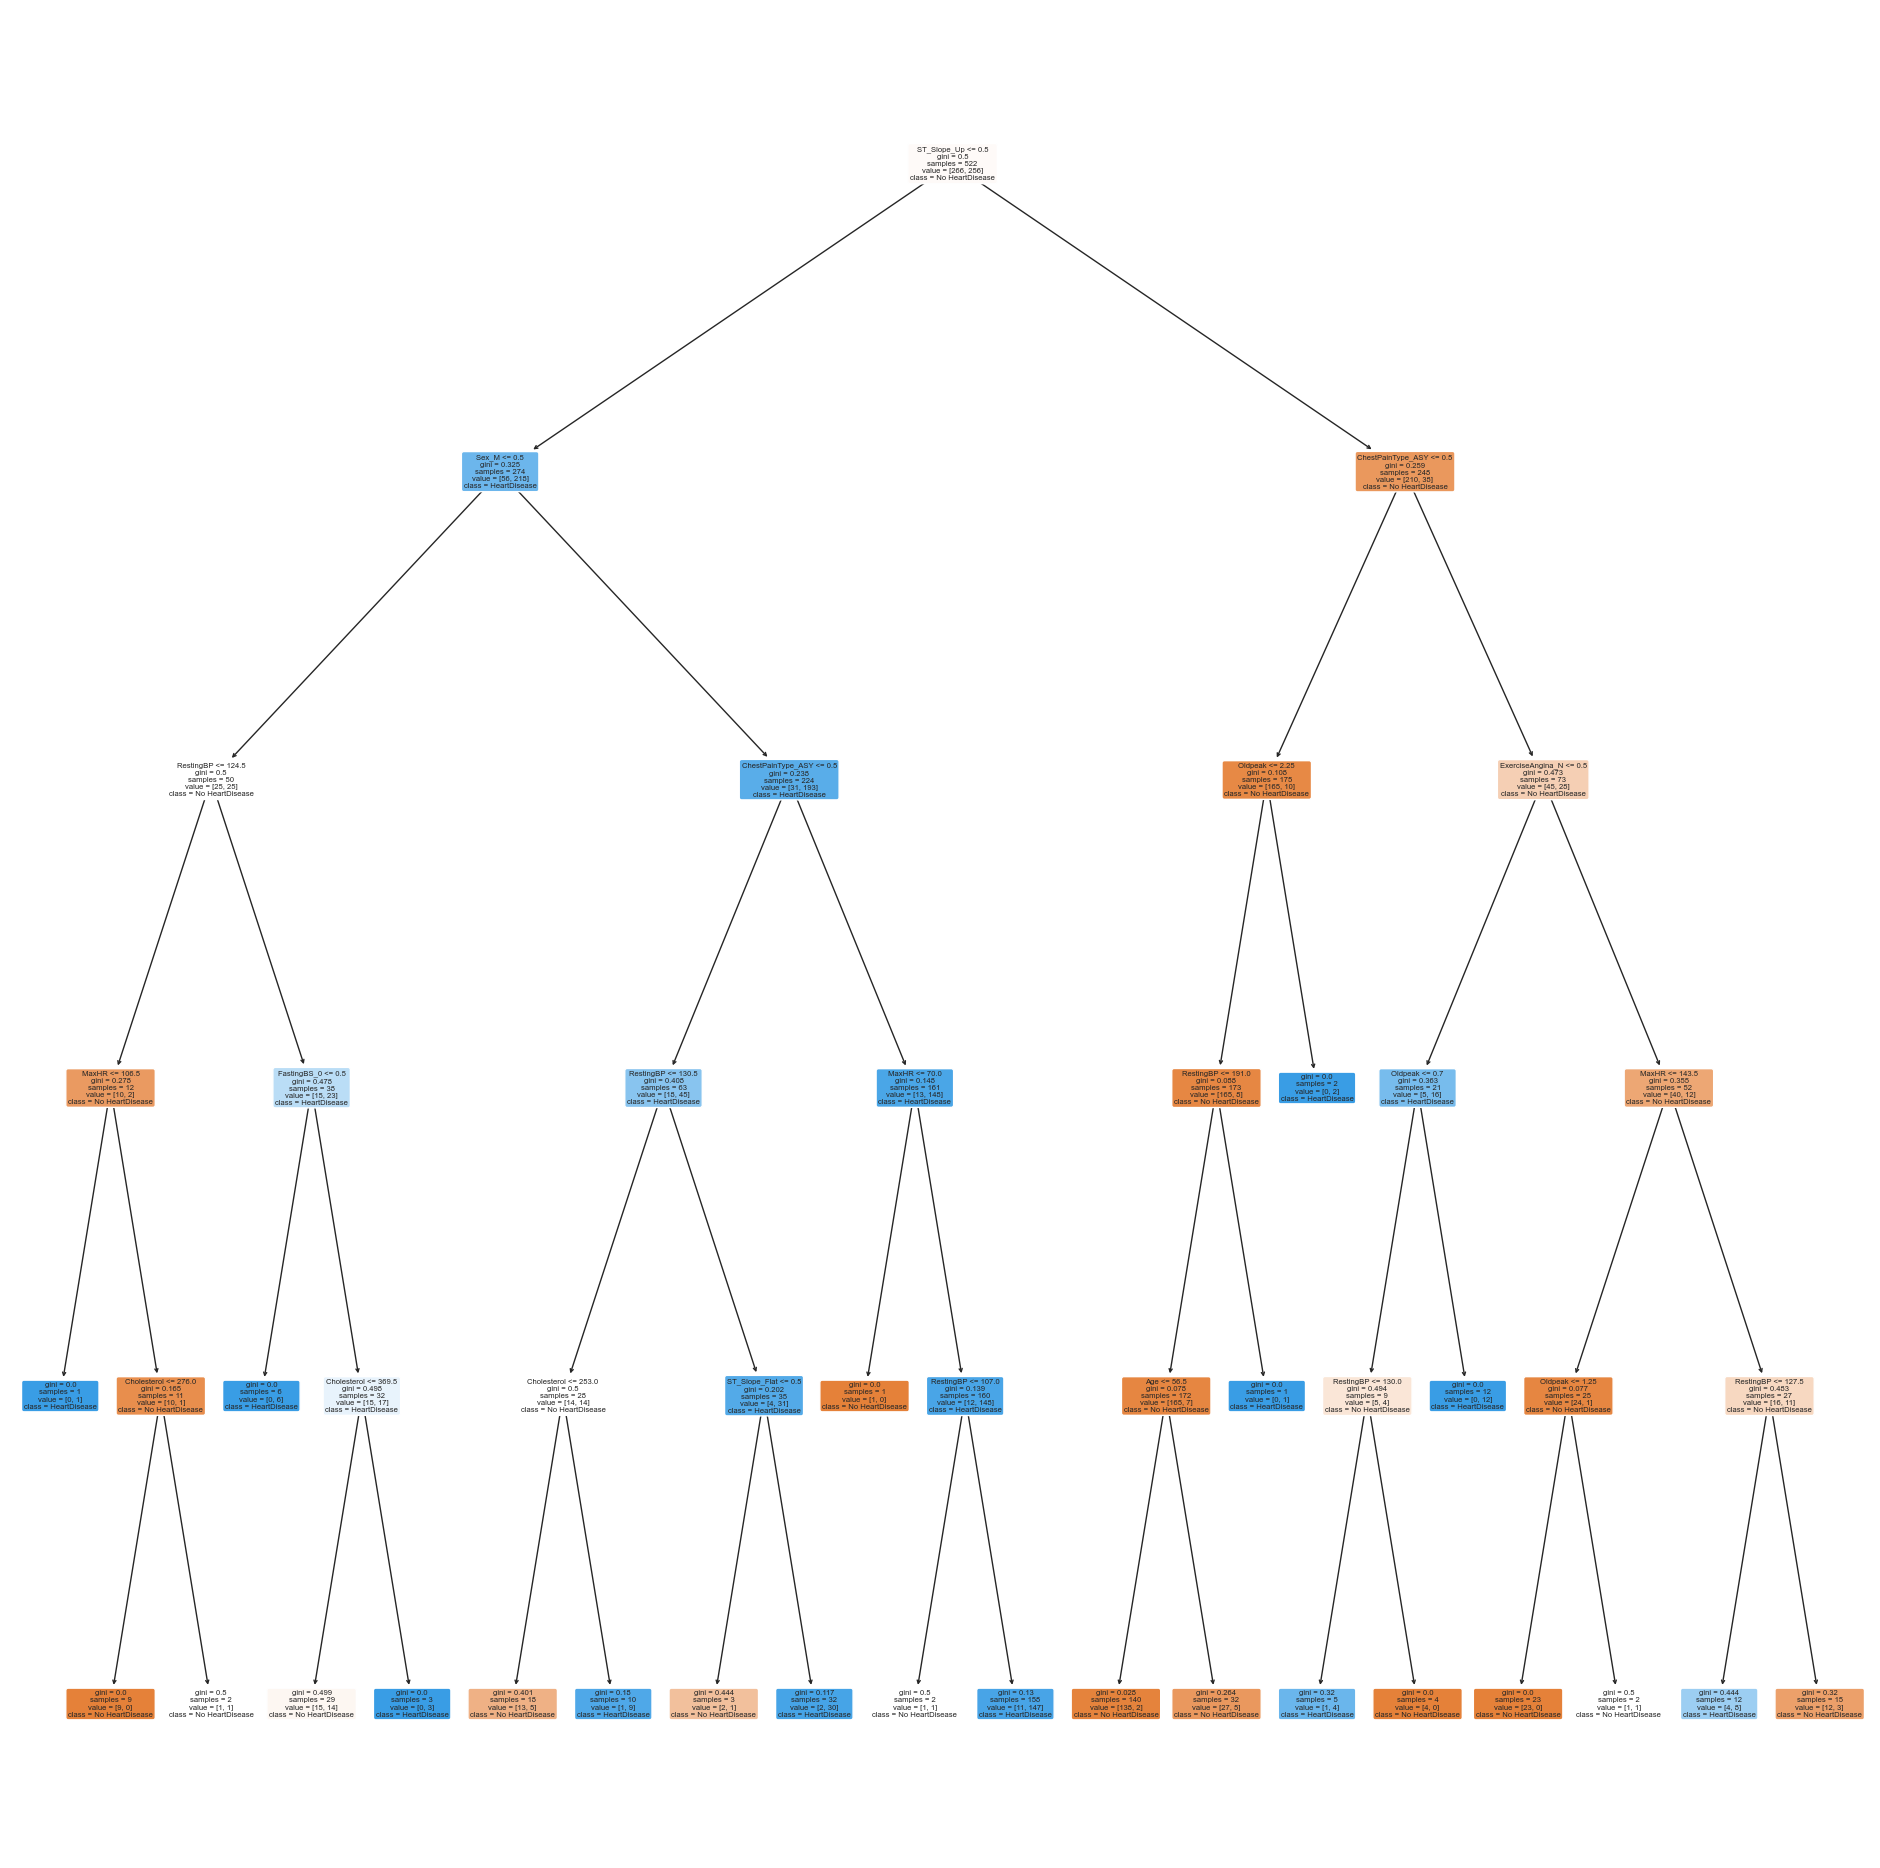

In [15]:
# Extract Response and Predictors
y = pd.DataFrame(data_ohe['HeartDisease'])
X = pd.DataFrame(data_ohe.drop('HeartDisease', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=50)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 5)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["No HeartDisease","HeartDisease"])

Train Data
Accuracy  :	 0.9003831417624522
F1 Score  :	 0.8955823293172691

TPR Train :	 0.87109375
TNR Train :	 0.9285714285714286

FPR Train :	 0.07142857142857142
FNR Train :	 0.12890625


Test Data
Accuracy  :	 0.8392857142857143
F1 Score  :	 0.816326530612245

TPR Test :	 0.8
TNR Test :	 0.8709677419354839

FPR Test :	 0.12903225806451613
FNR Test :	 0.2


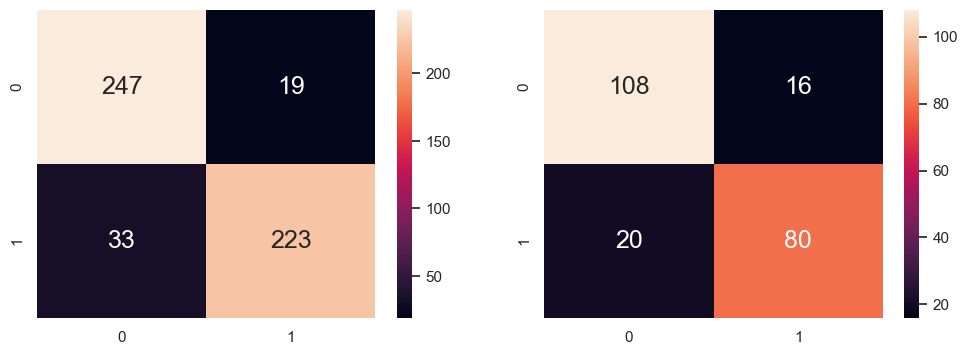

In [16]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print("F1 Score  :\t", f1_score(y_train, y_train_pred))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

print()
print()

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print("F1 Score  :\t", f1_score(y_test, y_test_pred))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

### Observations
| Test Data |   max_depth = 3    |    max_depth = 4    |  max_depth = 5      |
| :---              | :---: | :----: | :----: |
| Accuracy  |    0.84375   |    0.8660714285714286    |    0.8392857142857143    |
| F1 Score  |   0.8430493273542602    |   0.8529411764705882    |   0.816326530612245   |
| TPR Test  |   0.94    |   0.87   |    0.8   |
| TNR Test  |   0.7661290322580645    |    0.8629032258064516    |    0.8709677419354839    |
| FPR Test  |   0.23387096774193547    |   0.13709677419354838    |   0.12903225806451613    |
| FNR Test  |   0.06    |    0.13   |     0.2   |


The Classification Tree Model with a `max_depth = 4` has the highest accuracy value at `0.866` and F1 Score at `0.853`. 

However, we noticed that the model with `max_depth = 3` has a lower false negative rate (0.06 vs 0.13) which would be preferred in our context as it is more important to correctly identify people with heart disease, even if it meant that some healthy people undergo unnecessary tests.

Upon further analysis, our team decides that the Classification Tree Model with a `max_depth = 4` is our prefered model, providing the best balance between accuracy and convenience. Models with higher or lower max_depth would possibly result in under-fitting or over-fitting. Despite the model with a max_depth of 4 having a higher false negative rate compared to the model with a max_depth of 3, it has a much lower false positive rate, thus providing the best balance.

### Balancing the classes

While the HeartDisease variable in our dataset has a close number of patients in the 2 classes (390 without heart disease vs 356 with heart disease), it is not exactly balanced. Let's see if balancing the classes of the response `HeartDisease` can improve our model.

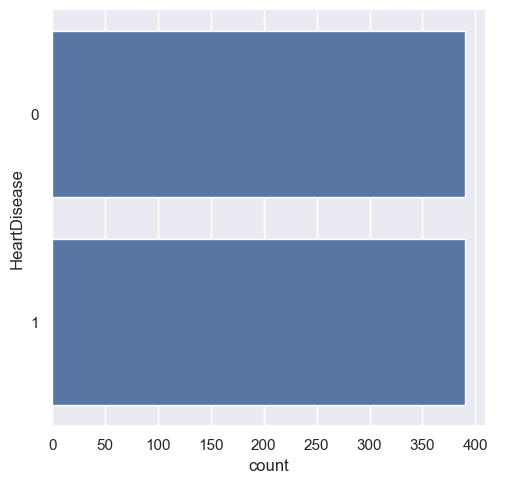

In [17]:
# Upsample HeartDisease to match No HeartDisease
from sklearn.utils import resample

HDyes = data_ohe[data_ohe.HeartDisease == 1]
HDno = data_ohe[data_ohe.HeartDisease == 0]
 
# Upsample the Bad samples
HDyes_up = resample(HDyes, 
                        replace=True,                     # sample with replacement
                        n_samples=HDno.shape[0])    # to match number of No HeartDisease
 
# Combine the two classes back after upsampling
data_ohe_up = pd.concat([HDno, HDyes_up])
 
# Check the ratio of the classes
data_ohe_up['HeartDisease'].value_counts()
sb.catplot(y = 'HeartDisease', data = data_ohe_up, kind = "count")

In [18]:
data_ohe_up.info()

<class 'pandas.core.frame.DataFrame'>
Index: 780 entries, 0 to 674
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                780 non-null    int64  
 1   RestingBP          780 non-null    int64  
 2   Cholesterol        780 non-null    int64  
 3   MaxHR              780 non-null    int64  
 4   Oldpeak            780 non-null    float64
 5   Sex_F              780 non-null    float64
 6   Sex_M              780 non-null    float64
 7   ChestPainType_ASY  780 non-null    float64
 8   ChestPainType_ATA  780 non-null    float64
 9   ChestPainType_NAP  780 non-null    float64
 10  ChestPainType_TA   780 non-null    float64
 11  FastingBS_0        780 non-null    float64
 12  FastingBS_1        780 non-null    float64
 13  RestingECG_LVH     780 non-null    float64
 14  RestingECG_Normal  780 non-null    float64
 15  RestingECG_ST      780 non-null    float64
 16  ExerciseAngina_N   780 non-null

[Text(0.5267857142857143, 0.9, 'ST_Slope_Up <= 0.5\ngini = 0.5\nsamples = 546\nvalue = [277, 269]\nclass = No HeartDisease'),
 Text(0.2857142857142857, 0.7, 'ChestPainType_ASY <= 0.5\ngini = 0.333\nsamples = 303\nvalue = [64, 239]\nclass = HeartDisease'),
 Text(0.14285714285714285, 0.5, 'MaxHR <= 135.5\ngini = 0.496\nsamples = 90\nvalue = [41, 49]\nclass = HeartDisease'),
 Text(0.07142857142857142, 0.3, 'Oldpeak <= 1.1\ngini = 0.32\nsamples = 30\nvalue = [6, 24]\nclass = HeartDisease'),
 Text(0.03571428571428571, 0.1, 'gini = 0.5\nsamples = 10\nvalue = [5, 5]\nclass = No HeartDisease'),
 Text(0.10714285714285714, 0.1, 'gini = 0.095\nsamples = 20\nvalue = [1, 19]\nclass = HeartDisease'),
 Text(0.21428571428571427, 0.3, 'Cholesterol <= 246.5\ngini = 0.486\nsamples = 60\nvalue = [35, 25]\nclass = No HeartDisease'),
 Text(0.17857142857142858, 0.1, 'gini = 0.353\nsamples = 35\nvalue = [27, 8]\nclass = No HeartDisease'),
 Text(0.25, 0.1, 'gini = 0.435\nsamples = 25\nvalue = [8, 17]\nclass = 

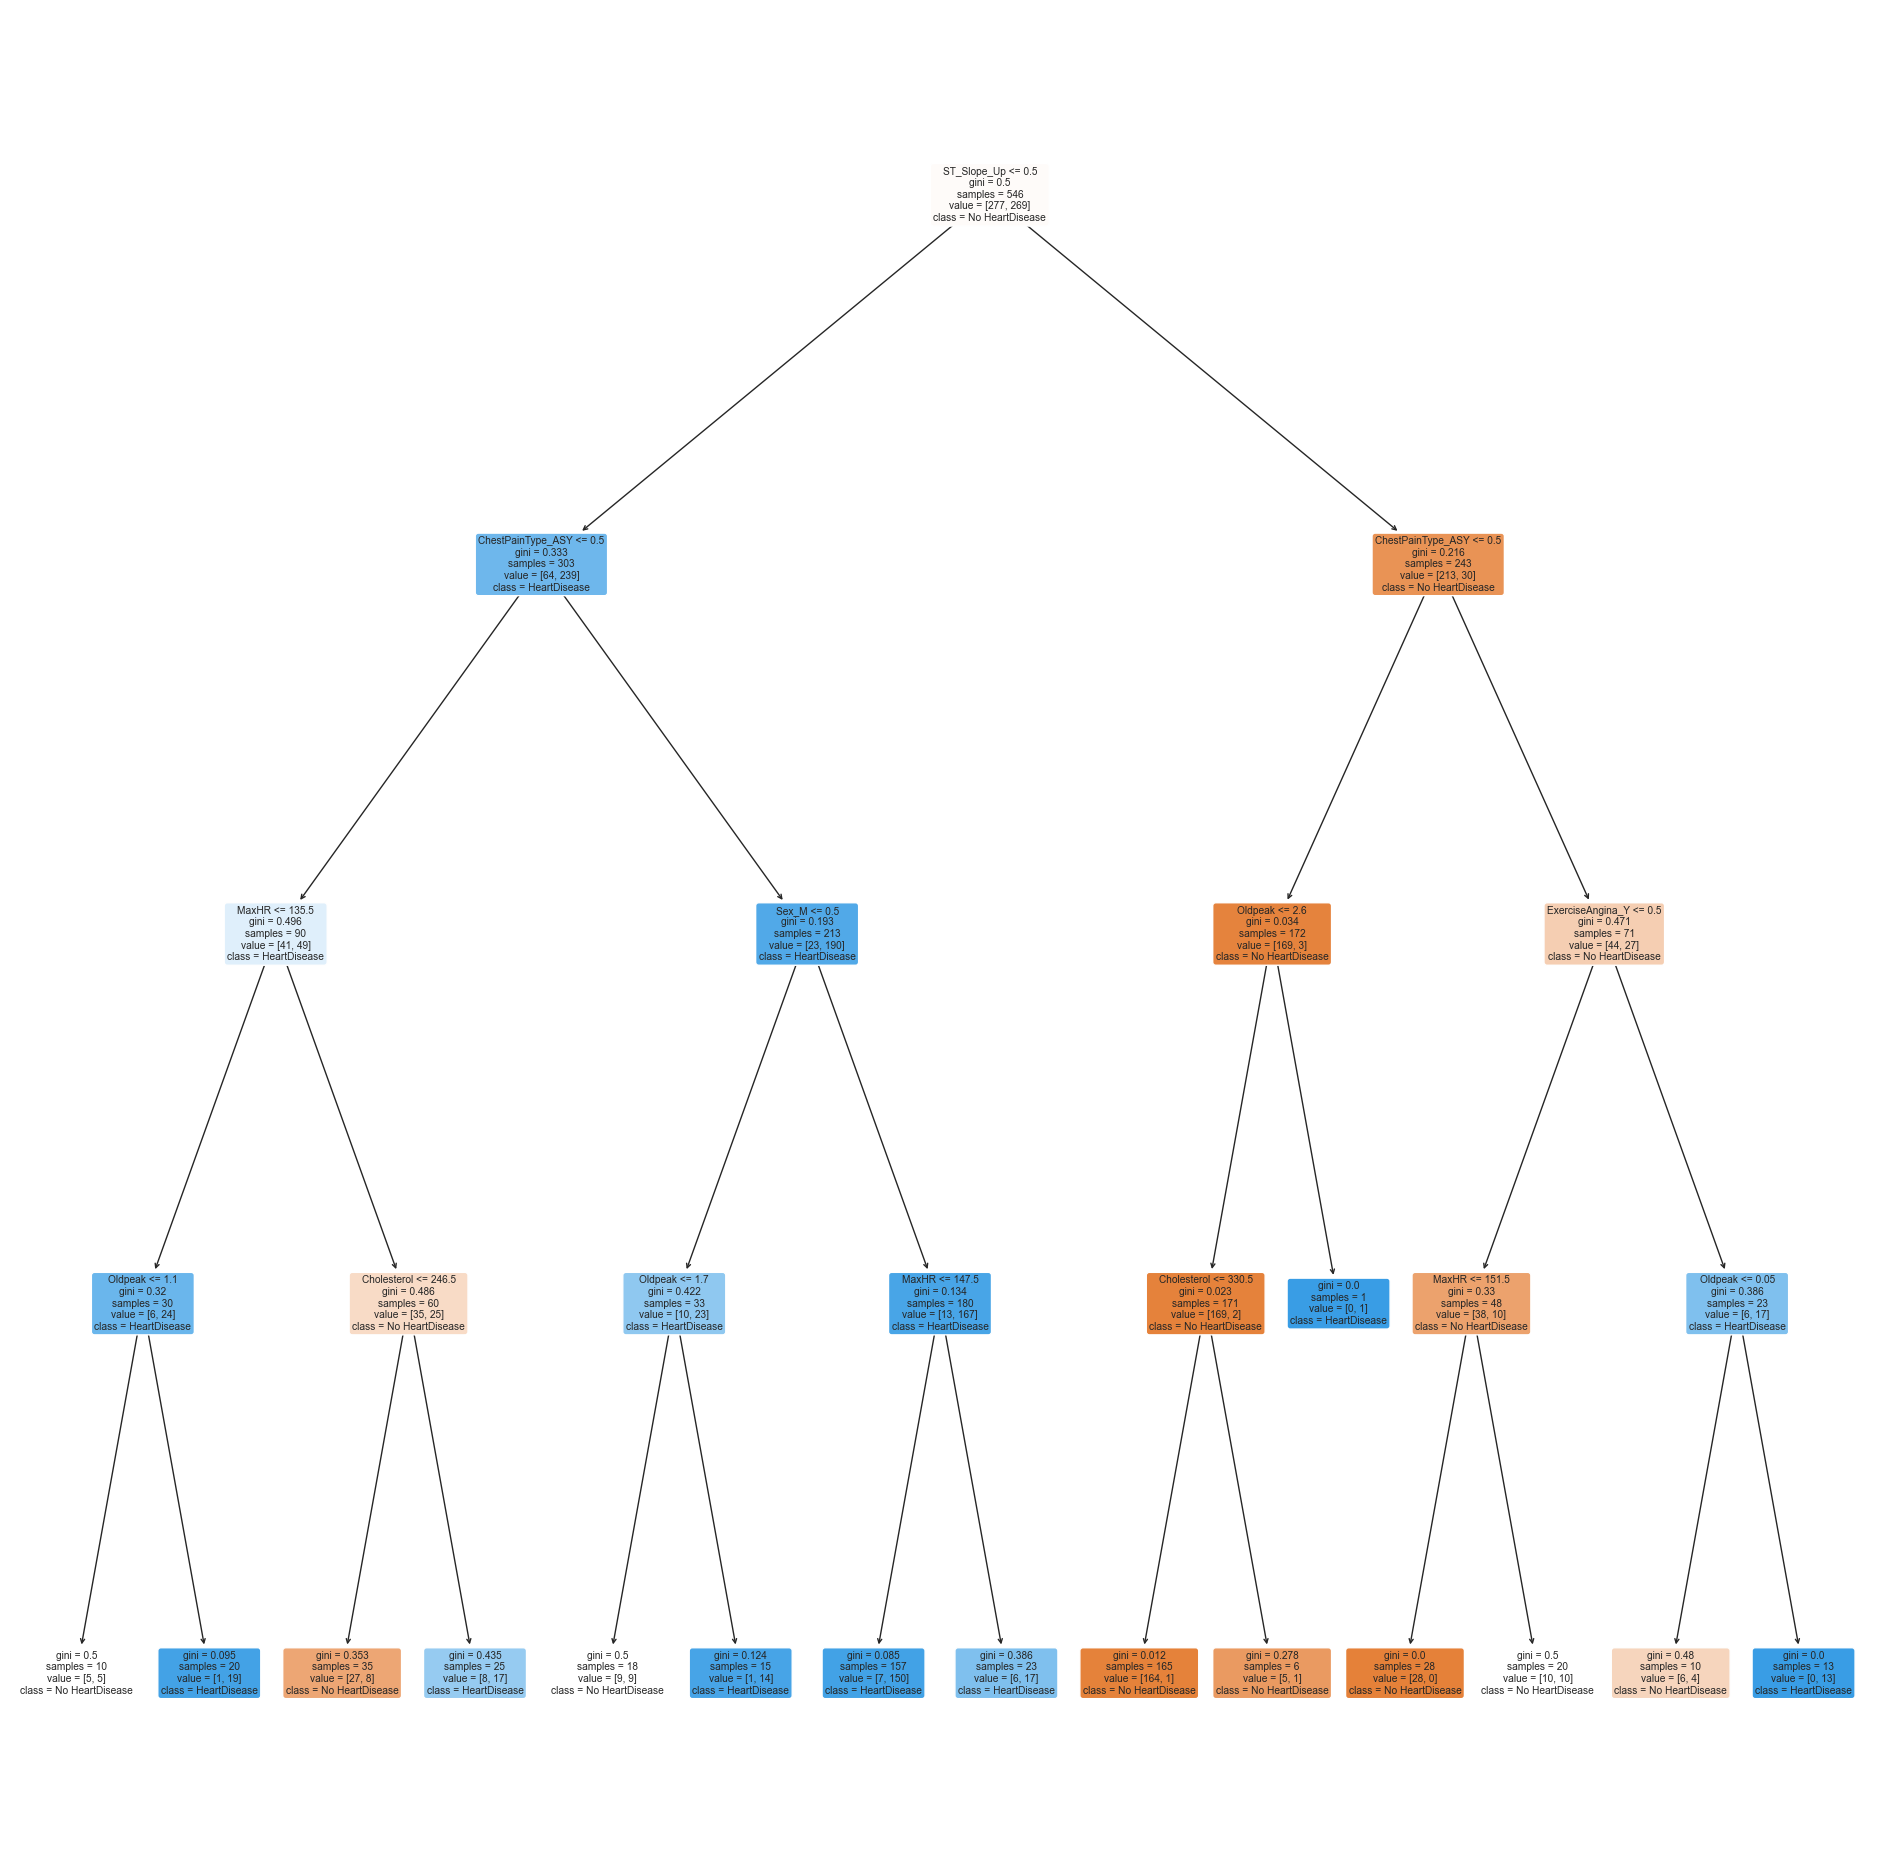

In [19]:
# Extract Response and Predictors
y = pd.DataFrame(data_ohe_up['HeartDisease'])
X = pd.DataFrame(data_ohe_up.drop('HeartDisease', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=50)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["No HeartDisease","HeartDisease"])

Train Data
Accuracy  :	 0.8882783882783882
F1 Score  :	 0.8833652007648184

TPR Train :	 0.8587360594795539
TNR Train :	 0.9169675090252708

FPR Train :	 0.08303249097472924
FNR Train :	 0.1412639405204461


Test Data
Accuracy  :	 0.8034188034188035
F1 Score  :	 0.7889908256880733

TPR Test :	 0.7107438016528925
TNR Test :	 0.9026548672566371

FPR Test :	 0.09734513274336283
FNR Test :	 0.2892561983471074


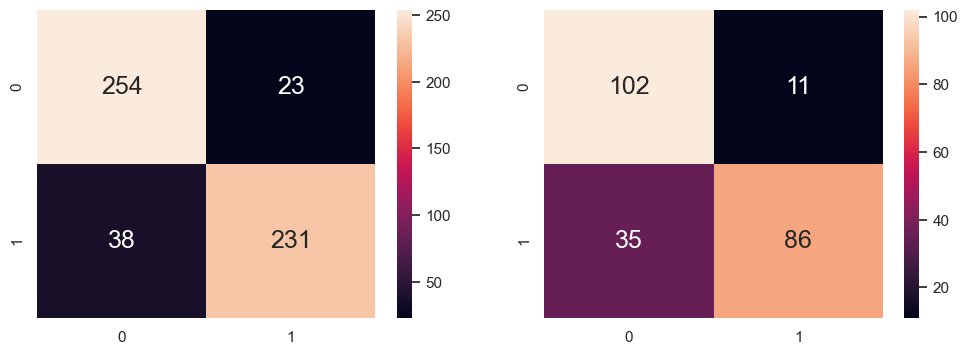

In [20]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print("F1 Score  :\t", f1_score(y_train, y_train_pred))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

print()
print()

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print("F1 Score  :\t", f1_score(y_test, y_test_pred))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

| Test Data |   without balance    |    with balance    |
| :---              | :---: | :----: |
| Accuracy  |   0.8660714285714286   |    0.8034188034188035    |
| F1 Score  |   0.8529411764705882   |   0.7889908256880733    |
| TPR Test  |   0.87    |     0.7107438016528925   |
| TNR Test  |      0.8629032258064516  |    0.9026548672566371    |
| FPR Test  |    0.13709677419354838   |   0.09734513274336283    |
| FNR Test  |     0.13  |    0.2892561983471074    |

### Observations
Given that the balancing the classes resulted in a model with a lower accuracy value and F1 score, the model without the balancing of classes is preferred.

## RandomForest

In [21]:
y = pd.DataFrame(data_ohe['HeartDisease'])
X = pd.DataFrame(data_ohe.drop('HeartDisease', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=50)

In [22]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 4)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.HeartDisease.ravel())

RandomForestClassifier(max_depth=4)

Train Data
Accuracy  :	 0.8888888888888888
F1 Score  :	 0.888030888030888

TPR Train :	 0.8984375
TNR Train :	 0.8796992481203008

FPR Train :	 0.12030075187969924
FNR Train :	 0.1015625


<Axes: >

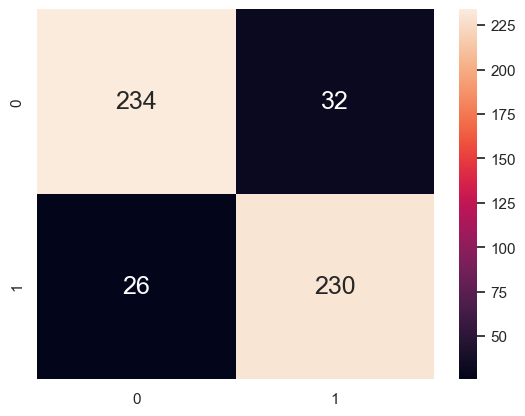

In [23]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print("F1 Score  :\t", f1_score(y_train, y_train_pred))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8660714285714286
F1 Score  :	 0.8623853211009174

TPR Test :	 0.94
TNR Test :	 0.8064516129032258

FPR Test :	 0.1935483870967742
FNR Test :	 0.06


<Axes: >

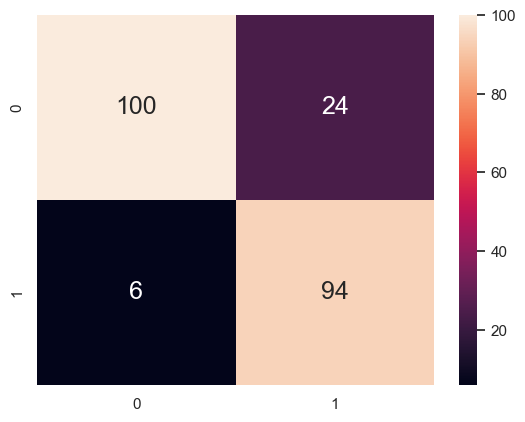

In [24]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print("F1 Score  :\t", f1_score(y_test, y_test_pred))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### Increasing number and depth of decision trees in the forest

In [25]:
y = pd.DataFrame(data_ohe['HeartDisease'])
X = pd.DataFrame(data_ohe.drop('HeartDisease', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=50)

In [26]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 1000,  # n_estimators denote number of trees
                                 max_depth = 10)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.HeartDisease.ravel())

RandomForestClassifier(max_depth=10, n_estimators=1000)

Train Data
Accuracy  :	 0.9923371647509579
F1 Score  :	 0.9922178988326849

TPR Train :	 0.99609375
TNR Train :	 0.9887218045112782

FPR Train :	 0.011278195488721804
FNR Train :	 0.00390625


<Axes: >

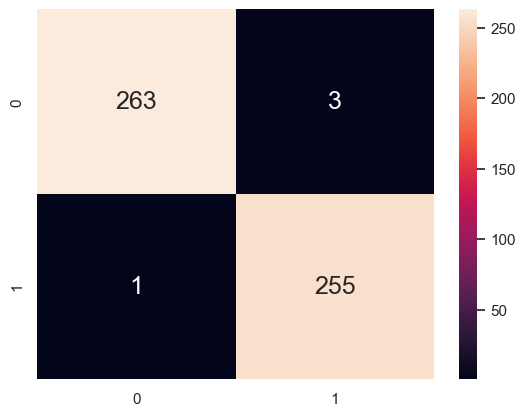

In [27]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print("F1 Score  :\t", f1_score(y_train, y_train_pred))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8794642857142857
F1 Score  :	 0.8720379146919431

TPR Test :	 0.92
TNR Test :	 0.8467741935483871

FPR Test :	 0.1532258064516129
FNR Test :	 0.08


<Axes: >

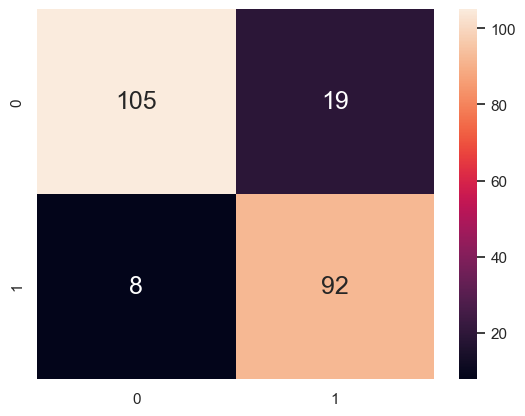

In [28]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print("F1 Score  :\t", f1_score(y_test, y_test_pred))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

## Cross-Validation

In [29]:
y = pd.DataFrame(data_ohe['HeartDisease'])
X = pd.DataFrame(data_ohe.drop('HeartDisease', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=50)

In [30]:
# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
from sklearn.model_selection import GridSearchCV

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(100,1001,100),   # number of trees 100, 200, ..., 1000
              'max_depth': np.arange(2, 11)}             # depth of trees 2, 3, 4, 5, ..., 10

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train.HeartDisease.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
             scoring='accuracy')

In [31]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

RandomForestClassifier(max_depth=8, n_estimators=300)
0.8678021978021979


### Use the Best Model found through GridSearchCV

In [32]:
y = pd.DataFrame(data_ohe['HeartDisease'])
X = pd.DataFrame(data_ohe.drop('HeartDisease', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=50)

In [33]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 300,  # n_estimators denote number of trees
                                 max_depth = 8)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.HeartDisease.ravel())

RandomForestClassifier(max_depth=8, n_estimators=300)

Train Data
Accuracy  :	 0.9636015325670498
F1 Score  :	 0.9632495164410058

TPR Train :	 0.97265625
TNR Train :	 0.9548872180451128

FPR Train :	 0.045112781954887216
FNR Train :	 0.02734375


<Axes: >

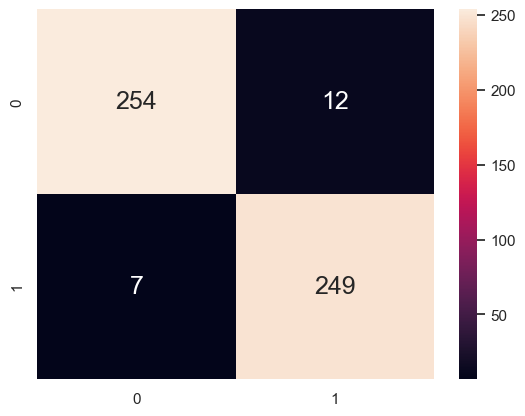

In [34]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print("F1 Score  :\t", f1_score(y_train, y_train_pred))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8794642857142857
F1 Score  :	 0.8732394366197184

TPR Test :	 0.93
TNR Test :	 0.8387096774193549

FPR Test :	 0.16129032258064516
FNR Test :	 0.07


<Axes: >

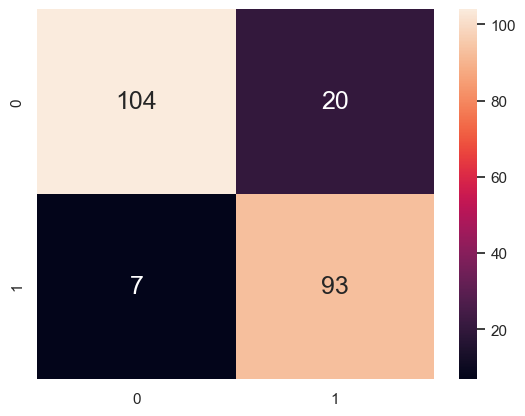

In [35]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print("F1 Score  :\t", f1_score(y_test, y_test_pred))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

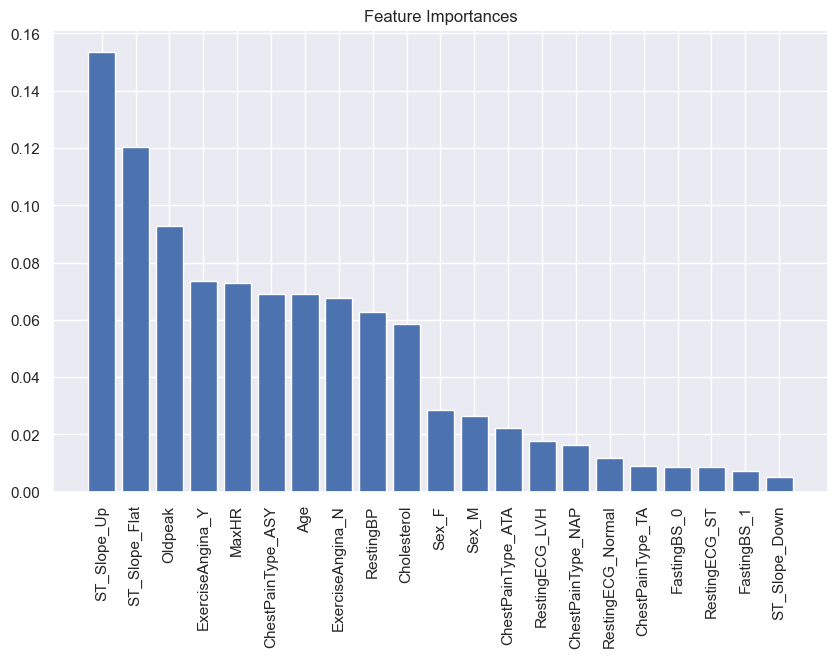

In [36]:
import matplotlib.pyplot as plt

# Get feature importances from the trained model
importances = rforest.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
sorted_feature_names = [feature_names[i] for i in indices]

# Plot the feature importances
plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), sorted_feature_names, rotation=90)
plt.show()


### Conclusion

| Test Data |   Classification Tree    |    Random Forest    |
| :---              | :---: | :----: |
| Accuracy  |   0.8660714285714286    |    0.8794642857142857    |
| F1 Score  |   0.8529411764705882    |    0.8732394366197184    |
| TPR Test  |  0.87    |    0.93    |
| TNR Test  |   0.8629032258064516    |   0.8387096774193549    | 
| FPR Test  |    0.13709677419354838	   |    0.16129032258064516    | 
| FNR Test  |    0.13   |    0.07   | 

The RandomForest Model manages to achieve the highest accuracy of `0.8794642857142857` and highest F1 score of `0.8732394366197184`.

The top 3 most important features are `ST_Slope_Up`, followed by `ST_Slope_Flat` and lastly `Oldpeak`